In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('data\\avito_new_data_for_dano.xlsx')  # Replace with the actual file name

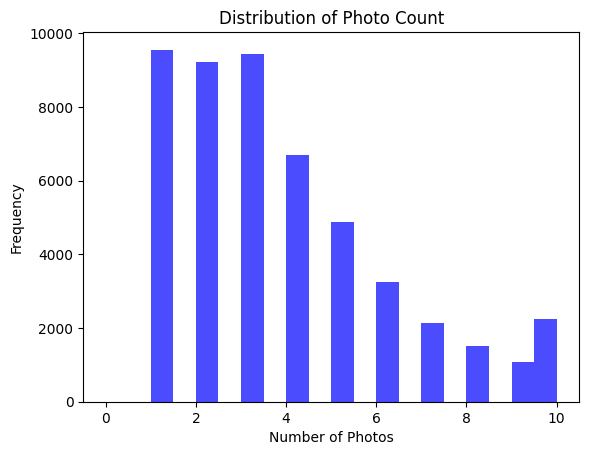

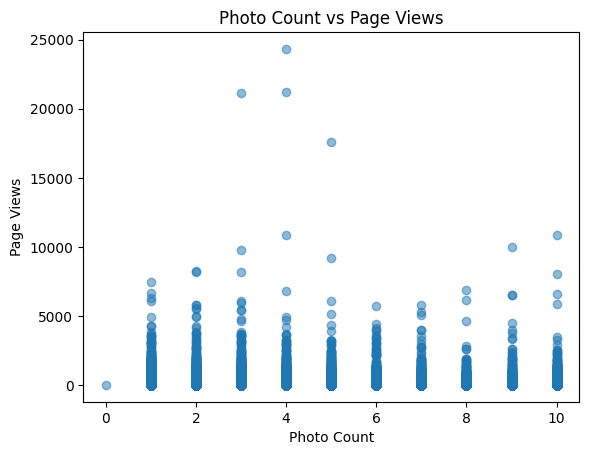

In [6]:
# Histogram for photo_count
plt.hist(df['photo_count'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Photo Count')
plt.xlabel('Number of Photos')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: photo_count vs page_views
plt.scatter(df['photo_count'], df['page_views'], alpha=0.5)
plt.title('Photo Count vs Page Views')
plt.xlabel('Photo Count')
plt.ylabel('Page Views')
plt.show()

In [7]:
df['seller_rating'].fillna(df['seller_rating'].median(), inplace=True)
Q1 = df['photo_count'].quantile(0.25)
Q3 = df['photo_count'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['photo_count'] >= Q1 - 1.5 * IQR) & (df['photo_count'] <= Q3 + 1.5 * IQR)]
df['liquidity_score'] = df['page_views'] + df['contacts'] + df['favorites']

D:\Программы\Temp\Temp\ipykernel_12960\1693455388.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seller_rating'].fillna(df['seller_rating'].median(), inplace=True)


In [11]:
df['photo_group'] = pd.cut(df['photo_count'], bins=[0, 4, 8, 20], labels=['Low', 'Medium', 'High'])

In [12]:
from scipy.stats import ttest_ind, kruskal

# T-test for video presence
group1 = df[df['has_video'] == 1]['liquidity_score']
group2 = df[df['has_video'] == 0]['liquidity_score']
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-test: t_stat={t_stat}, p_value={p_value}")

# Kruskal-Wallis test for photo groups
low = df[df['photo_group'] == 'Low']['liquidity_score']
medium = df[df['photo_group'] == 'Medium']['liquidity_score']
high = df[df['photo_group'] == 'High']['liquidity_score']
h_stat, p_value = kruskal(low, medium, high)
print(f"Kruskal-Wallis test: h_stat={h_stat}, p_value={p_value}")

T-test: t_stat=2.5512562737045075, p_value=0.010736626317692245
Kruskal-Wallis test: h_stat=31.550314029169755, p_value=1.4090822928738416e-07


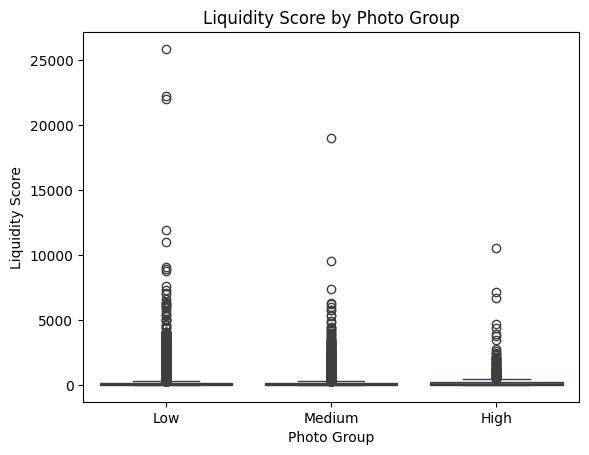

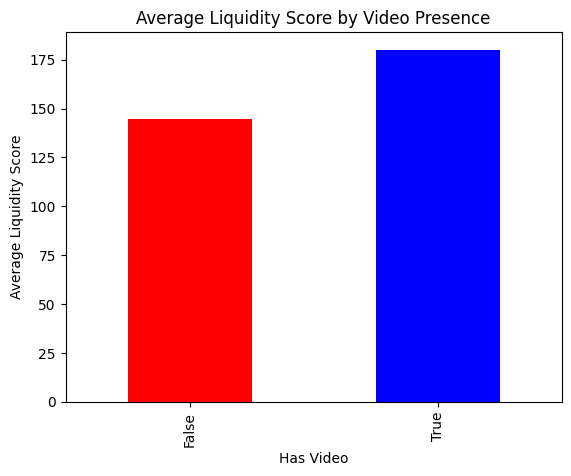

In [13]:
import seaborn as sns

# Boxplot for photo groups
sns.boxplot(x='photo_group', y='liquidity_score', data=df)
plt.title('Liquidity Score by Photo Group')
plt.xlabel('Photo Group')
plt.ylabel('Liquidity Score')
plt.show()

# Bar chart for video presence
video_means = df.groupby('has_video')['liquidity_score'].mean()
video_means.plot(kind='bar', color=['red', 'blue'])
plt.title('Average Liquidity Score by Video Presence')
plt.xlabel('Has Video')
plt.ylabel('Average Liquidity Score')
plt.show()